<div align="center"> 
    <h1> TP4 - TRANSFORMEE MULTIECHELLE 2D</h1>
    <h3>Réalisé par : </h3>
    <h3>YABA BILONGO Michel Davel</h3>
</div>

In [851]:
import numpy as np
from skimage.color import rgb2gray
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from ipynb.fs.full.my_functions import *

### 1. J'implémente pour une image de taille n*n l'algorithme direct pour les 2 transformées multi-échelles en utilisant le produit tensoriel

#### - Pour la transformée de Haard

In [607]:
def haar2D_direct(u):
    n = len(u)
    v = np.copy(u)
    w = np.zeros((n,n))
    m = n 
    while 1 < m :
        for k in range(0,math.floor(m)):
            w[k,:math.floor(m)] = haar_1d_direct(math.floor(m),v[k, :math.floor(m)])
        v = np.copy(w)
        for k in range(0,math.floor(m)):
            w[:math.floor(m),k] = haar_1d_direct(math.floor(m),v[:math.floor(m),k])
        v = np.copy(w)
        m = m/2
    return v

#### - Pour la transformée quadratique

In [608]:
def quad2D_direct(u):
    n=len(u)
    v= np.copy(u)
    w = np.zeros((n,n))
    m = n
    
    while 1 < m:
        for k in range(0,math.floor(m)):
            #on traite chaque ligne par Quad1D_direct
            w[k,:math.floor(m)] = quad1D_direct(v[k,:math.floor(m)], math.floor(m))
        v = np.copy(w)
        for k in range(0, math.floor(m)):
            #on traite chaque colonne par Quad1D_direct
            w[:math.floor(m), k] = quad1D_direct(v[:math.floor(m), k], math.floor(m))
        v = np.copy(w)
        m = m/2
    return v

### 2. Implémentation de l'algorithme inverse pour les 2 transformées multi-échelles en utilisant le produit tensoriel

#### - Pour la transformée de Haard

In [609]:
def haar2D_inverse(u):
    n = len(u)
    v = np.copy(u)
    w = np.copy(u)
    m = 1  
    while m < n + 1 :
        for k in range(0,math.floor(m)):
            w[:math.floor(m),k] = haar_1d_inverse(math.floor(m),v[:math.floor(m),k])
        v = np.copy(w)
        for k in range(0,math.floor(m)):
            w[k,:math.floor(m)] = haar_1d_inverse(math.floor(m),v[k,:math.floor(m)])
        v = np.copy(w)
        m = m*2
    return v 

#### - Pour la transformée quadratique

In [610]:
def quad2D_inverse(u):
    n = len(u)
    v = np.copy(u)
    w = np.copy(u)
    m = 1
    while m < n+1:
        for k in range(0, math.floor(m)):
            w[:math.floor(m),k] = quad1D_inverse(math.floor(m),v[:math.floor(m),k])
        v = np.copy(w)
        for k in range(0,math.floor(m)):
            w[k,:math.floor(m)] = quad1D_inverse(math.floor(m),v[k,:math.floor(m)])
        v = np.copy(w)
        m = m*2
    return v 

### 3. Vérification de l'identité

#### 3.a) Avec la matrice 8*8 vue en classe

In [611]:
# Création d'une matrice 8*8 contenant sur chaque ligne les valeurs de 1 à 8
m_test = [i for i in range(1, 9)]
#m_test = np.array(m_test)
for i in range(3):
    m_test.extend(m_test)

m_test = np.array(m_test)
m_test = np.array(m_test).reshape(8,8)
m_test

array([[1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [1, 2, 3, 4, 5, 6, 7, 8]])

In [612]:
# Transformée directe de Haar sur la matrice 8*8
direct = haar2D_direct(m_test)
direct

array([[ 4.5, -2. , -1. , -1. , -0.5, -0.5, -0.5, -0.5],
       [ 0. ,  0. , -1. , -1. , -0.5, -0.5, -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. , -0.5, -0.5, -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. , -0.5, -0.5, -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

In [613]:
# Transformée inverse de Haar sur la transformée directe
inverse = haar2D_inverse(direct)
inverse

array([[1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.]])

On constate que la matrice obtenue à partir de la transformée inverse de Haar est bien celle correspondante à notre matrice de départ.

In [614]:
# Transformée quadratique directe sur la matrice 8*8
d = quad2D_direct(m_test)
d

array([[ 4.5, -2. , -1. , -1. , -0.5, -1. , -1. , -0.5],
       [ 0. ,  0. , -1. , -1. , -0.5, -1. , -1. , -0.5],
       [ 0. ,  0. ,  0. ,  0. , -0.5, -1. , -1. , -0.5],
       [ 0. ,  0. ,  0. ,  0. , -0.5, -1. , -1. , -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

In [615]:
# Transformée quadratique inverse sur la transformée quadratique directe
inv = quad2D_inverse(d)
inv

array([[1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.],
       [1., 2., 3., 4., 5., 6., 7., 8.]])

On constate que la matrice obtenue à partir de la transformée inverse de Haar est bien celle correspondante à notre matrice de départ.

#### - Avec Une image n*n

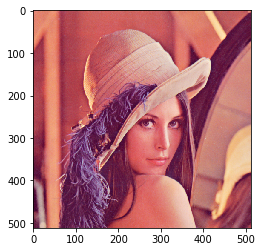

In [733]:
img = mpimg.imread('lena.png') 
plt.imshow(img)

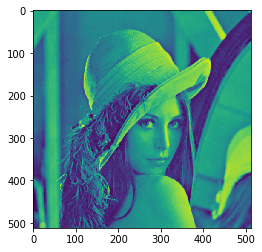

In [734]:
gray = rgb2gray(img)   
plt.imshow(gray)

In [633]:
img = mpimg.imread('lena.png')     
gray = rgb2gray(img)   
X = gray
#on arrondi les valeurs de cette matrice à 8 chiffres après la virgule pour toutes les lignes
x2=[np.round(i,8) for i in x]
x2 = np.array(x2)
x2.reshape(x.shape[0], x.shape[0])
x2

array([[0.63615845, 0.63615845, 0.63621845, ..., 0.66482747, 0.60747806,
        0.50256079],
       [0.63615845, 0.63615845, 0.63621845, ..., 0.66482747, 0.60747806,
        0.50256079],
       [0.63615845, 0.63615845, 0.63621845, ..., 0.66482747, 0.60747806,
        0.50256079],
       ...,
       [0.16672001, 0.16672001, 0.19592079, ..., 0.40837923, 0.3921208 ,
        0.38551099],
       [0.17224236, 0.17224236, 0.21390746, ..., 0.40627099, 0.41181139,
        0.4234059 ],
       [0.17224236, 0.17224236, 0.21390746, ..., 0.40627099, 0.41181139,
        0.4234059 ]])

In [630]:
# Transformée directe de Haar
direct_haar = haar2D_direct(x2)
print("La transformée directe de x est : \n",direct_haar)
# Transformée inverse de Haar
inverse_haar = haar2D_inverse(direct_haar)
#on arrondit les valeurs de cette matrice à 8 chiffres après la virgule pour toutes les lignes
inverse_haar2=[np.round(i,8) for i in inverse_haar]
inverse_haar2 = np.array(inverse_haar2)
inverse_haar2.reshape(x.shape[0], x.shape[0])
print("\n La transformée inverse est : \n",inverse_haar2)
# Vérification avec x
x2 == inverse_x2

La transformée directe de x est : 
 [[ 4.86387008e-01 -5.19908858e-02 -1.34484021e-02 ... -3.95451000e-03
   3.71882000e-03  5.24586350e-02]
 [ 2.58766375e-02  2.75699221e-02  2.53794772e-02 ... -3.95451000e-03
   3.71882000e-03  5.24586350e-02]
 [ 2.41331789e-02 -2.84786118e-02 -1.41413208e-02 ...  1.79882500e-03
   1.68250950e-02  5.14590250e-02]
 ...
 [-1.06970600e-02  1.40504900e-02  1.08157000e-03 ...  3.10548750e-03
   9.08833500e-03 -1.11078450e-02]
 [ 6.92705500e-03  2.78068500e-03  6.70590000e-04 ...  4.68232500e-04
   1.98166750e-03 -2.02352500e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]

 La transformée inverse est : 
 [[0.63615845 0.63615845 0.63621845 ... 0.66482747 0.60747806 0.50256079]
 [0.63615845 0.63615845 0.63621845 ... 0.66482747 0.60747806 0.50256079]
 [0.63615845 0.63615845 0.63621845 ... 0.66482747 0.60747806 0.50256079]
 ...
 [0.16672001 0.16672001 0.19592079 ... 0.40837923 0.3921208  0.38551099

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

Après vérification, on remarque bien que toutes les valeurs de chaque lignes sont identiques
dans la matrice d'origine et l'inverse du direct de cette matrice. L'identité est donc bien vérifiée.

In [631]:
# Transformée quadratique directe
direct_quad = quad2D_direct(x)
print("La transformée quadratique directe de x est : \n",direct_quad)
# Transformée quadratique inverse
inverse_quad = quad2D_inverse(direct_quad)
#on arrondit les valeurs de cette matrice à 8 chiffres après la virgule pour toutes les lignes
inverse_quad2=[np.round(i,8) for i in inverse_quad]
inverse_quad2 = np.array(inverse_quad2)
inverse_quad2.reshape(x.shape[0], x.shape[0])
print("\n La transformée inverse est : \n",inverse_quad2)
# Vérification avec x
x2 == inverse_quad2

La transformée quadratique directe de x est : 
 [[ 4.86387008e-01 -5.19908858e-02 -1.34484021e-02 ... -1.36959542e-02
   1.70328189e-02  5.24586331e-02]
 [ 2.58766375e-02  2.75699221e-02  2.53794772e-02 ... -1.36959542e-02
   1.70328189e-02  5.24586331e-02]
 [ 2.41331789e-02 -2.84786118e-02 -1.41413208e-02 ... -9.16065713e-04
   3.75587977e-02  5.14590231e-02]
 ...
 [-8.98794149e-03  1.57288242e-02  2.55144612e-03 ... -5.27514245e-04
   6.63662329e-03 -1.29054924e-02]
 [ 1.02942887e-02  1.81699778e-03  2.24034343e-03 ... -9.39866501e-05
   2.36568610e-03  2.80636965e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]

 La transformée inverse est : 
 [[0.63615845 0.63615845 0.63621845 ... 0.66482747 0.60747806 0.50256079]
 [0.63615845 0.63615845 0.63621845 ... 0.66482747 0.60747806 0.50256079]
 [0.63615845 0.63615845 0.63621845 ... 0.66482747 0.60747806 0.50256079]
 ...
 [0.16672001 0.16672001 0.19592079 ... 0.40837923 0.3921208

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

Après vérification, on remarque bien que toutes les valeurs de chaque lignes sont identiques
dans la matrice d'origine et l'inverse du direct de cette matrice. L'identité est donc bien vérifiée.

### 4. Pour une image X de taille n*n, on ajoute du bruit gaussien et puis on applique le seuillage pour le débruitage. 
cela revient à ajouter à l'image X le bruit B vous obtenez l'image Y=X+B. Ensuite vous transformez cette image Y pour obtenir Z=transformée direct(Y). Ensuite vous allez seuillez l'image Z et enfin vous appliquez transformeinverse à Z pour obtenir R=transformeinverse(Z) et vous comparez R et X

In [804]:
B = np.random.normal(0, 0.5, x.shape)
print("Le bruit gaussien : \n ",B)

# on ajoute ce bruit à l'image
#Y1 = X + B
Y = np.clip((x + B*0.2),0,1)

print("\n L'image avec bruit est : \n",Y)

# on transforme l'image Y par la transformée quadratique direct
# Le choix de la quadratique c'est parce que suite à nos analyses dans
# les précédents tps, elle nous donne moins d'erreur que haar
Z = quad2D_direct(Y)
print("\nLa transformée direct de l'image bruitée est :\n",Z)

#on applique le seuillage à l'image transformée
#Soit un seuil T=-14
# Je choisis au hasard un seuil inférieur à 0 car j'ai remarqué
# lors de mes analyses précédentes qu'il y avait moins d'erreurs avec un seuil inférieur à zéro
T=0.0001
Z_seuille = seuillage(Z, T)
print("\n Z seullé : \n",Z_seuille)

# j'applique la transformée inverse sur le seuillage pour débruiter
R = quad2D_inverse(Z_seuille)
print("\n L'image  débruitée est : \n",R)

print("\n L'image d'origine est : \n",x)

Le bruit gaussien : 
  [[ 0.21454774  0.12001987 -0.31734577 ...  0.76535455 -0.42680162
   0.79000436]
 [-0.21704463  0.37666976  0.62225253 ... -0.8201107  -0.05286956
   0.15349826]
 [-0.47324873 -0.06658765 -0.1810898  ... -0.08011033  0.45629282
   0.03302713]
 ...
 [ 0.58248543 -0.24452174  0.40561231 ... -0.28151657 -0.01041376
   0.38523658]
 [ 0.14119787  0.35339548 -0.30768624 ...  0.07824868 -0.20248389
  -0.38381147]
 [-0.63976773 -0.5489462  -0.84411655 ...  0.18686592 -0.49919289
   0.29691108]]

 L'image avec bruit est : 
 [[0.679068   0.66016242 0.5727493  ... 0.81789838 0.52211773 0.66056167]
 [0.59274952 0.7114924  0.76066896 ... 0.50080533 0.59690415 0.53326045]
 [0.5415087  0.62284092 0.60000049 ... 0.6488054  0.69873662 0.50916622]
 ...
 [0.28321709 0.11781566 0.27704325 ... 0.35207592 0.39003805 0.4625583 ]
 [0.20048193 0.24292145 0.15237021 ... 0.42192073 0.37131461 0.3466436 ]
 [0.04428881 0.06245312 0.04508415 ... 0.44364418 0.31197281 0.48278811]]

La transfor

#### -  Affichage des coefficients gardés

In [840]:
#Pour un seuil = 0.
ind = np.where(Z_seuille>0) #on récupère les indices du tableau dont les valeurs sont supérieures à 0
coef_garde= Z_seuille[ind] #on récupère les valeurs de ces indices
print("Les coefficients gardes sont :\n ", coef_garde)

Les coefficients gardes sont :
  [0.48647205 0.06058603 0.07468353 ... 0.03827814 0.00222948 0.04887158]


#### - Localisation des coefficients

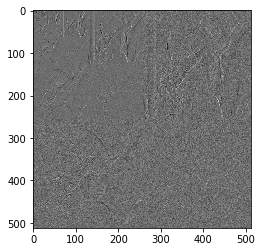

In [805]:
# Visualisation de la transformée de l'image bruitée
plt.imshow(Z, cmap='gray')

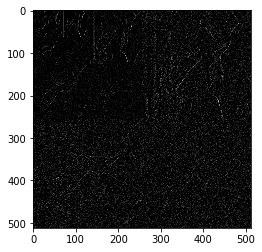

In [806]:
# Visualisation de la transformée de l'image bruitée avec un seuil de 0.0001
plt.imshow(Z_seuille, cmap='gray')

Les coefficients importants sont en dessous de l'intensité de l'image et dans la zone qui recouvre la tête et le chapeau.

### 5. Etudier numériquement la qualité de la reconstruction par rapport aux seuils utilisés. Faire le graphe de l’erreur en fonction du seuil.

In [841]:
# fonction qui renvoie les erreurs en fonction des seuils
def getErreur(seuil, x, y):
    e = []
    for i in seuil:
        x_T = X - quad2D_inverse(seuillage(y, i))
        e_T = np.linalg.norm((x_T), ord=2)
        
        e.append(e_T)
    return e

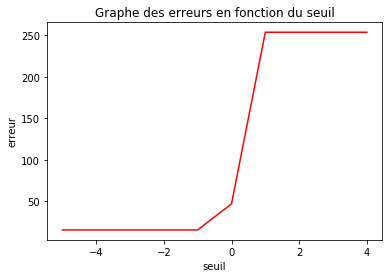

In [842]:
# Je choisis les seuils de -5 à 5
T = [t for t in range(-5, 5)]
e = getErreur(T, X, direct_haar)
affichage(T, e, 'r')

Je constate que l'erreur est  faible et constante pour un seuil inférieur à -1. Entre les seuils -1 à 0, on a une augmentation progressive de l'erreur qui atteint une valeur de 50. Entre 0 et 1, on constate également une augmentation progressive de l'erreur qui atteint environ 250. Au delà d'un seuil de 1, l'erreur est très grande et constante à une valeur de 250. 

### 6. Pour une image X de taille n × n appliquer les transformée directes : haar et quadratique. Ensuite ne garder pour la transformée inverse que les coefficients plus grands qu’un certain seuil. Etudier numériquement la qualité de la reconstruction pour ces deux transformées par rapport au nombres de coefficients gardés.

In [925]:
def erreurReconstructionQuad(seuil, x, y):
    e = []
    #for i in seuil:
    #s = 0.2
    inverse_seuil = quad2D_inverse(seuillage(y, seuil))
    x_T = X - inverse_seuil
    e_T = np.linalg.norm((x_T), ord=2)
    index = np.where(inverse_seuil>0)
    c_garde= inverse_seuil[index]    
    #e.append(e_T)
    return (e_T, len(c_garde))

In [926]:
def erreurReconstructionHaar(seuil, x, y):
    e = []
    #for i in seuil:
    inverse_seuil = haar2D_inverse(seuillage(y, seuil))
    x_T = X - inverse_seuil
    e_T = np.linalg.norm((x_T), ord=2)
    index = np.where(inverse_seuil>0)
    c_garde= inverse_seuil[index]    
    #e.append(e_T)
    return (e_T, len(c_garde))

In [948]:
#T = [t for t in range(-5, 5)]
#T = 0.2
T = [-2, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
     1, 2, 3, 4, 5]
T2 = [ 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5]

In [951]:
# fonction d'affichage du graphe
def affichage2(coef, erreur, couleur):
    plt.plot(coef, erreur, color=couleur)
    plt.xlabel('Nombre de coefficient gardes')
    plt.ylabel('erreur')
    plt.title('Graphe des erreurs en fonction du nombre de coefficients')
    plt.legend

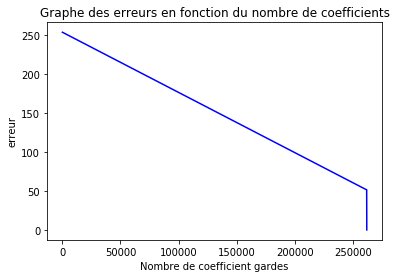

In [953]:
# Pour la transforméee de Haar
tabErreur = []
tabCoef = []
for i in T:
    eRHaar, coefGH = erreurReconstructionHaar(i, X, direct_haar)
    tabErreur.append(eRHaar)
    tabCoef.append(coefGH)
affichage2(tabCoef, tabErreur, 'b')
#tabCoef

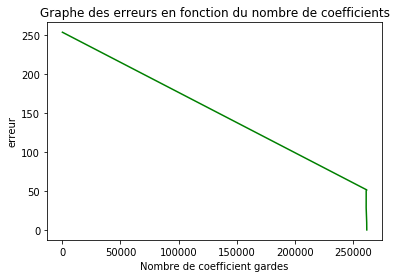

In [954]:
# Pour la transformée quadratique
tabErreur2 = []
tabCoef2 = []
for i in T:
    eRQuad, coefG = erreurReconstructionQuad(i, X, direct_quad)
    tabErreur2.append(eRQuad)
    tabCoef2.append(coefG)
affichage2(tabCoef2, tabErreur2, 'g')
#tabCoef

L'observation des 2 graphes aussi bien pour la transformée de Haar que quadratique nous permet d'en déduire que plus on a des coefficients gardés moins on a d'erreurs.